# Analysis of Steam Video Games

Proposal Link: https://docs.google.com/document/d/1Noqd4qP94bXpyHnC2KD6X1sCfMSktbVCK_fM7OvtX08/edit

## Data Download and Collection
To download datasets from kaggle, you need to use a token. You can access my token through https://drive.google.com/file/d/1G6aYAJlOgy7NApLzS3q_TlImpd-XT1ap/view?usp=sharing.

And then upload it here


![56124e.png](https://editor.analyticsvidhya.com/uploads/56124e.PNG)


In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Download [Steam store games](https://www.kaggle.com/nikdavis/steam-store-games). After unzipping, you can access the files at /content/steamstore

In [ ]:
!kaggle datasets download -d nikdavis/steam-store-games

 48% 17.0M/35.2M [00:00<00:00, 20.3MB/s]
100% 35.2M/35.2M [00:00<00:00, 48.2MB/s]


In [ ]:
!unzip -q /content/steam-store-games.zip -d steamstore

In [ ]:
!rm -rf /content/steam-store-games.zip

## Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd

games = pd.read_csv('/content/steamstore/steam.csv')

In [ ]:
def categories_count(games,col):
    '''
    games is a pd.DataFrame object with all infomation,
    extract either the genres or category column to know how many games in each catergory
    values in each contains semicolon, separate values by comma and count their occurence
    and output as a pd.dataframe
    :param x: pd.DataFrame
    :param col: str, either categorize data base on genres or categories
    :return: pd.DataFrame
    '''
    
    assert isinstance(games,pd.DataFrame)
    assert isinstance(col,str)
    assert col == 'categories' or col == 'genres'
    x = games[col]
    assert isinstance(x, pd.Series)

    s= x.str.split(r";",expand = True)
    vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
    vals.columns = ["Num of Games"]
    vals.index.name = col

    return vals


In [ ]:
#return number of games in each categories

categories_count(games,'categories')
categories_count(games,'genres')

,Num of Games
genres,
Tutorial,1.0
Documentary,1.0
Accounting,6.0
Photo Editing,12.0
Game Development,17.0
Web Publishing,28.0
Audio Production,29.0
Software Training,31.0
Video Production,38.0


In [ ]:
def average_rating(game,col):
    
    '''
    games is a pd.DataFrame object with all infomation,
    extract either the genres or category column to know how averagge games, positive ratings,
    neggative ratings, prices, and owners, in each catergory
    categories/genere data semicolon, separate values by comma and count their occurence,
    
    :param x: pd.DataFrame
    :param col: str, either categorize data base on genres or categories
    :return: pd.DataFrame
    '''
    
    assert isinstance(game,pd.DataFrame)
    assert isinstance(col,str)
    assert col == 'categories' or col == 'genres'
    x = game[col]
    assert isinstance(x, pd.Series)
    
    games = game.copy()
    columns = ['positive_ratings','negative_ratings','average_playtime','price','owners']
    
    users= games['owners'].str.split(r"-",expand = True)
    users = users.astype(int)
    games['owners'] = (users[0]+users[1])//2
    
    s= games[col].str.split(r";",expand = True)
    vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
    vals.columns = ["Num of Games"]
    vals.index.name = col
    
    for column in columns:
        temp = games[column].astype(int)
        counts = dict.fromkeys(list(vals.index),0)
        
        for i in list(s.columns):
            
            for key in counts.keys():
                tempInfo = temp[s[i]== key]
                counts[key]+=tempInfo.sum()
            
            
        vals[column]=vals.index.map(counts)/vals['Num of Games']
    
    return vals

In [ ]:
# return the  averagge games, positive ratings, neggative ratings, prices, and owners, in each catergory
info = average_rating(games,'categories')


# find correlation between each categories
info.corr()


,Num of Games,positive_ratings,negative_ratings,average_playtime,price,owners
Num of Games,1.000000,-0.220991,-0.211267,-0.338109,-0.037052,-0.263855
positive_ratings,-0.220991,1.000000,0.978846,0.869258,0.387825,0.934108
negative_ratings,-0.211267,0.978846,1.000000,0.863984,0.418506,0.875175
average_playtime,-0.338109,0.869258,0.863984,1.000000,0.072749,0.835433
price,-0.037052,0.387825,0.418506,0.072749,1.000000,0.359834
owners,-0.263855,0.934108,0.875175,0.835433,0.359834,1.000000


## Data Visualization

In [ ]:
from turtle import color
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import re

import itertools

default_color = sns.color_palette('pastel')

In [ ]:
df = pd.read_csv("steamstore/steam.csv")
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
df = df.assign(**{'overall_reviews':df.positive_ratings + df.negative_ratings})
df = df.assign(**{'positive_rate':df.positive_ratings / df.overall_reviews})

df = df.assign(**{'has_achievments':df.achievements > 0})
df = df.assign(**{'free':df.price == 0})
df['release_date'] = pd.to_datetime(df['release_date'])

## Total Games over Years

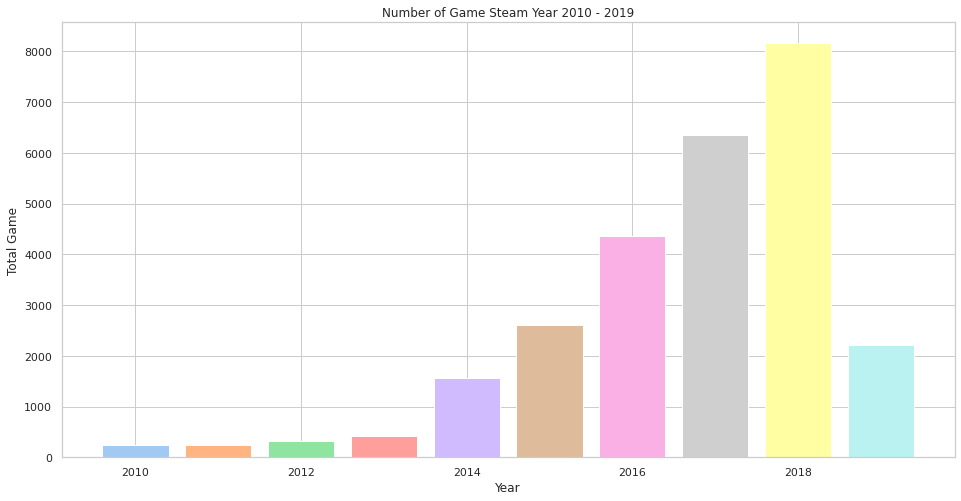

In [ ]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
steamYear = df.groupby(['release_year'])['appid'].count()

#Range Year antara 2010 - 2029
steamYearRange = steamYear.loc[2010:2019]

#Membuat plot
colors = sns.color_palette('pastel')
plt.figure(figsize=(16,8))
plt.bar(steamYearRange.index, steamYearRange,color=colors)
plt.xlabel("Year")
plt.ylabel("Total Game")
plt.title("Number of Game Steam Year 2010 - 2019")

plt.show()

## Language

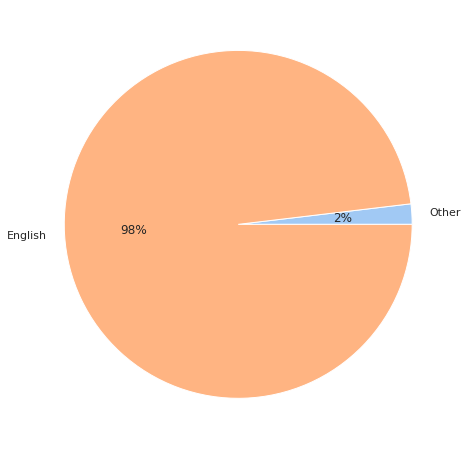

In [ ]:
steamLanguage = df.groupby(['english'])['appid'].count()
#Membuat plot
language_data = list(steamLanguage)
language_lable = ['Other', 'English']
colors = sns.color_palette('pastel')
plt.figure(figsize=(16,8))
plt.pie(language_data, labels=language_lable, colors=colors, autopct='%.0f%%')
plt.show()

## Platform

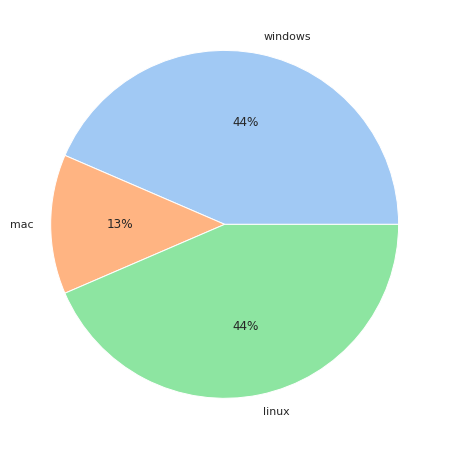

In [ ]:
operating_systems = ['windows', 'mac', 'linux']

df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
system_data = [df[df['windows']].shape[0], df[df['mac']].shape[0], df['linux'].shape[0]]
system_labels = ['windows', 'mac', 'linux']
colors = sns.color_palette('pastel')
plt.figure(figsize=(16,8))
plt.pie(system_data, labels=system_labels, colors=colors, autopct='%.0f%%')
plt.show()

## Gernes

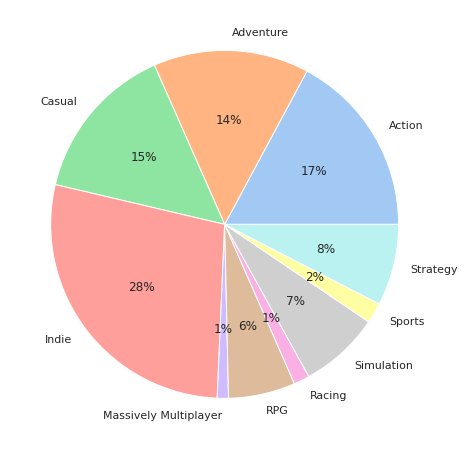

In [ ]:
def process_gen_tag(df):    
  gen_cols = ['Action','Adventure','Casual','Indie',
              'Massively Multiplayer','RPG','Racing',
              'Simulation','Sports','Strategy']

  gen_col_names = []

  for col in sorted(gen_cols):
      col_name = col.lower().replace('&', 'and').replace(' ', '_')
      gen_col_names.append(col_name)
      
      df[col_name] = df['genres'].apply(lambda x: 1 if col in x.split(';') else 0)

  gen_sums = df[gen_col_names].sum(axis=1)
  df = df[gen_sums > 0]    
  return df
df = process_gen_tag(df)

genre_cols = ['Action','Adventure','Casual','Indie',
                'Massively Multiplayer','RPG','Racing',
                'Simulation','Sports','Strategy']
gen_cols = df.columns[-10:]
average_owners_per_genre = list(df[gen_cols].sum())

colors = sns.color_palette('pastel')
plt.figure(figsize=(16,8))
plt.pie(average_owners_per_genre, labels=genre_cols, colors=colors, autopct='%.0f%%')
plt.show()

## Price Overview and Changes

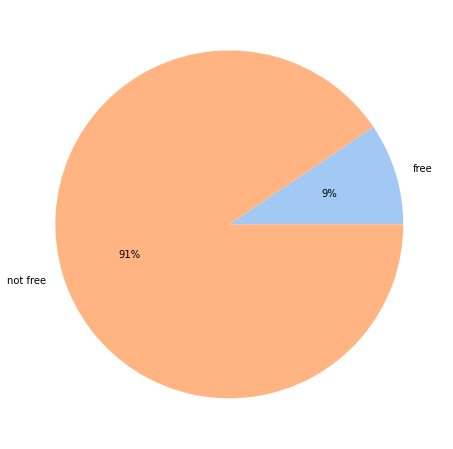

In [ ]:
free, not_free = df[df['price'] == 0].shape[0], df[df['price'] != 0].shape[0]

plt.figure(figsize=(16,8))
price_data = [free, not_free]
price_lable = ['free', 'not free']
colors = sns.color_palette('pastel')
plt.pie(price_data, labels=price_lable, colors=colors, autopct='%.0f%%')
plt.show()

In [ ]:
free_df, not_free_df = df[df['price'] == 0], df[df['price'] != 0]
def process_gen_tag_bar(df):
  df = process_gen_tag(df)
  genre_cols = ['Action','Adventure','Casual','Indie',
                'Massively Multiplayer','RPG','Racing',
                'Simulation','Sports','Strategy']
  gen_cols = df.columns[-10:]
  average_owners_per_genre = list(df[gen_cols].sum())
  norm = [float(i)/sum(average_owners_per_genre) for i in average_owners_per_genre]
  new_d = dict(zip(gen_cols,norm))
  large = {k: v for k, v in sorted(new_d.items(), key=lambda item: item[1],reverse=True)[:4]}
  small = {k: v for k, v in sorted(new_d.items(), key=lambda item: item[1],reverse=True)[4:]}
  ratios = list(large.values())+[sum(small.values())]
  legends = list(large.keys())+['others']
  return ratios[::-1], legends[::-1]

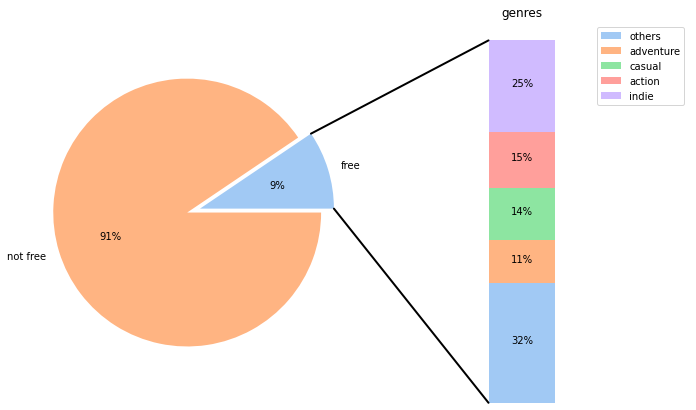

In [ ]:
from matplotlib.patches import ConnectionPatch
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
fig.subplots_adjust(wspace=0)

# pie chart parameters
explode = [0.1, 0]
price_data = [free, not_free]
price_lable = ['free', 'not free']
colors = sns.color_palette('pastel')
# rotate so that first wedge is split by the x-axis
angle = -180 * price_data[0]
ax1.pie(price_data, labels=price_lable, colors=colors, autopct='%.0f%%', explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
r1,l1 = process_gen_tag_bar(free_df)
width = .2
colors = sns.color_palette('pastel')

for j in range(len(r1)):
    height = r1[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('genres')
ax2.legend(l1)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

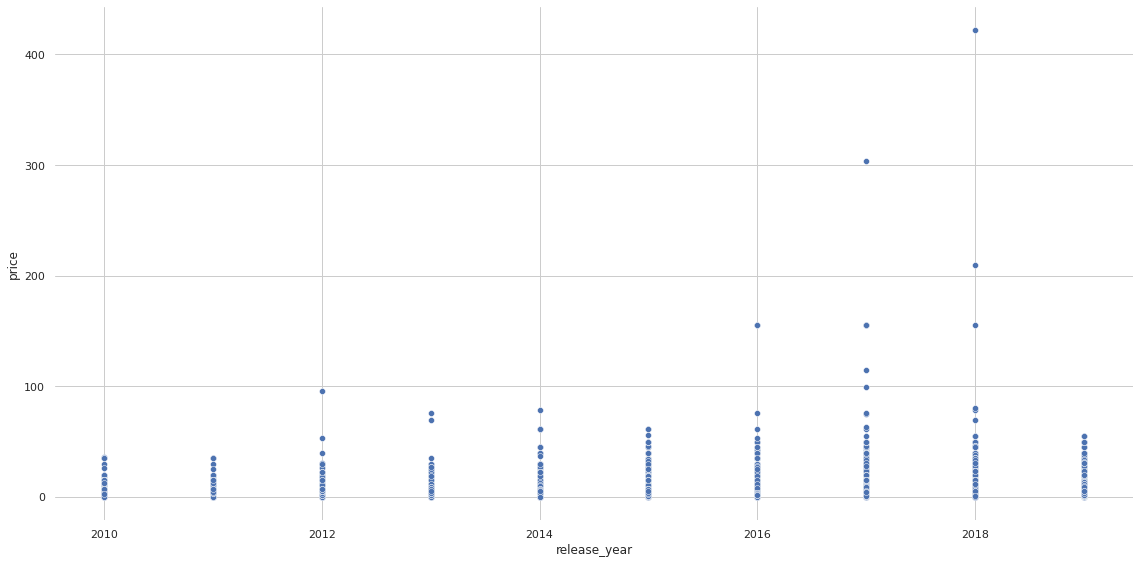

In [ ]:
import matplotlib.image as image
def get_year(s):
  return int(s.split('-')[0])

df_year = df[['release_year', 'price']].copy()
df_year = df_year[df_year['release_year'].between(2010, 2019)]

sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_year,
    x="release_year", y="price",
    palette=cmap, height=8, aspect=2,
  )
g.ax.xaxis.grid(True, "minor", linewidth=1)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.show()

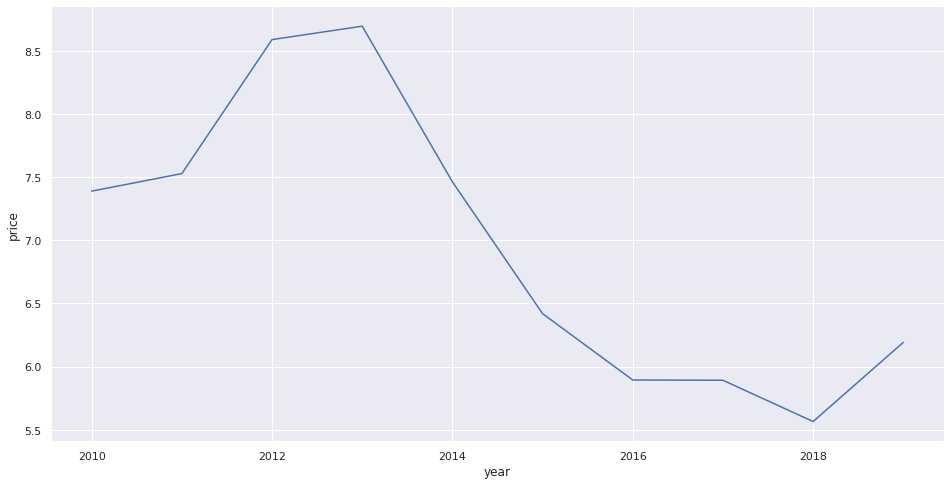

In [ ]:
df_year = df[['release_date', 'price']].copy()
df_year['year'] = df_year['release_date'].apply(lambda x: x.year)
df_year = df_year[df_year['year'].between(2010, 2019)]
data_year_price = df_year.groupby(['year'])['price'].mean()
df_year_price = pd.DataFrame({'year': data_year_price.index, 'price': data_year_price.values})

plt.figure(figsize=(16,8))
sns.set_theme()
sns.lineplot(x='year', y='price', data=df_year_price)
plt.show()

In [ ]:
df_year_price['num'] = list(steamYearRange)

Text(0.5, 1.0, '2016 to 2019 Announcements')

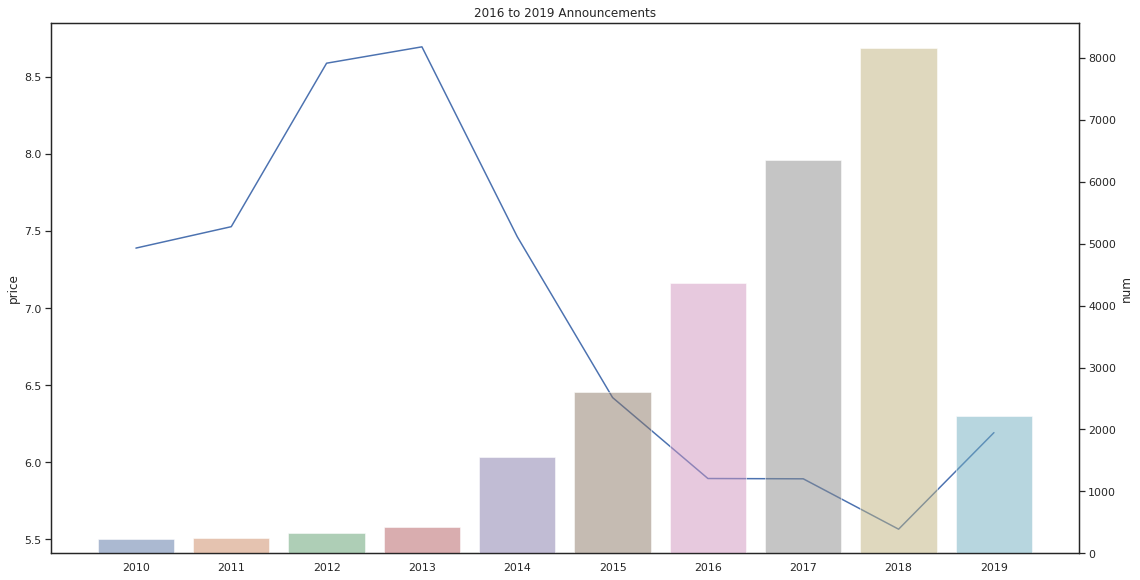

In [ ]:
sns.set_theme(style="white")
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()
sns.barplot(x="year", y="num", data=df_year_price, ax=ax2, alpha=.5)
sns.lineplot(x=np.arange(0,len(df_year_price)), y="price", data=df_year_price, ax=ax1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('2016 to 2019 Announcements')

## Publishers

In [ ]:
pub_l = list(df.publisher.value_counts().iloc[:top].index)

In [ ]:
df_pub = df[df['publisher'].isin(pub_l)][['publisher','positive_ratings','negative_ratings']]


In [ ]:
df_pub.groupby(['publisher'])['positive_ratings'].count()

publisher
1C Entertainment        88
Big Fish Games         212
Choice of Games         94
Dagestan Technology     88
SEGA                    78
Sekai Project           96
Square Enix             97
Strategy First         136
THQ Nordic              98
Ubisoft                111
Name: positive_ratings, dtype: int64

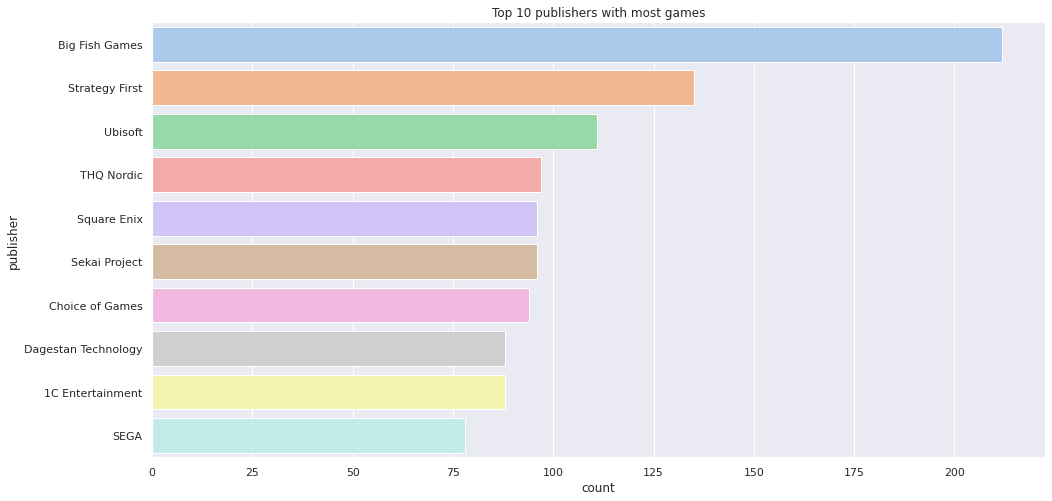

In [ ]:
top=10
plt.figure(figsize=(16,8))
plt.title(f'Top {top} publishers with most games')

colors = sns.color_palette('pastel')
sns.countplot(y="publisher", data=df,
        order=df.publisher.value_counts().iloc[:top].index,
        palette='pastel')

plt.show()

## Developers

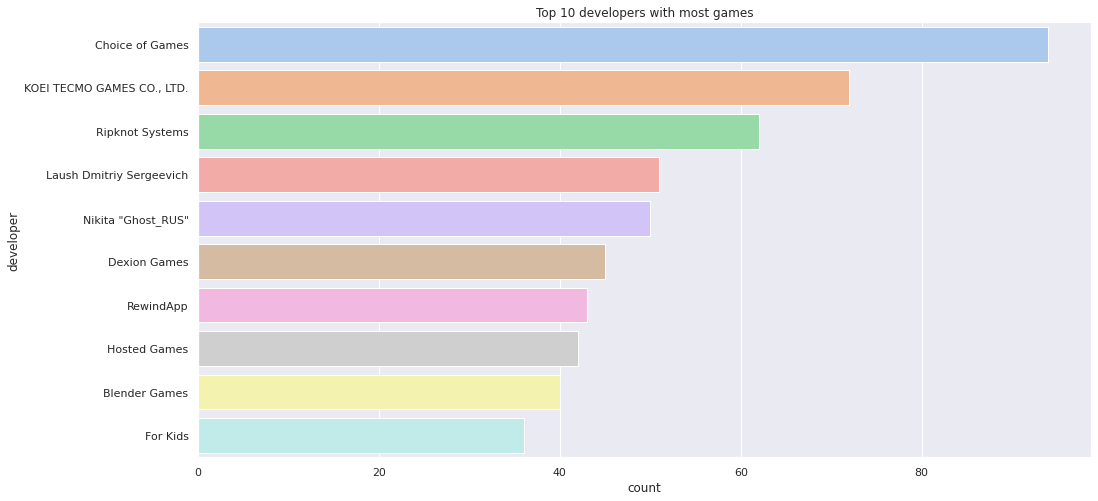

In [ ]:
top=10
plt.figure(figsize=(16,8))
plt.title(f'Top {top} developers with most games')
sns.countplot(y='developer', data=df, order=df.developer.value_counts().iloc[:10].index, palette='pastel')
plt.show()

In [ ]:
agg_developers = df.groupby('developer').agg({'overall_reviews': ['min', 'max', 'median'], 'name':'count', 'positive_rate': 'mean', 'price':'mean'})

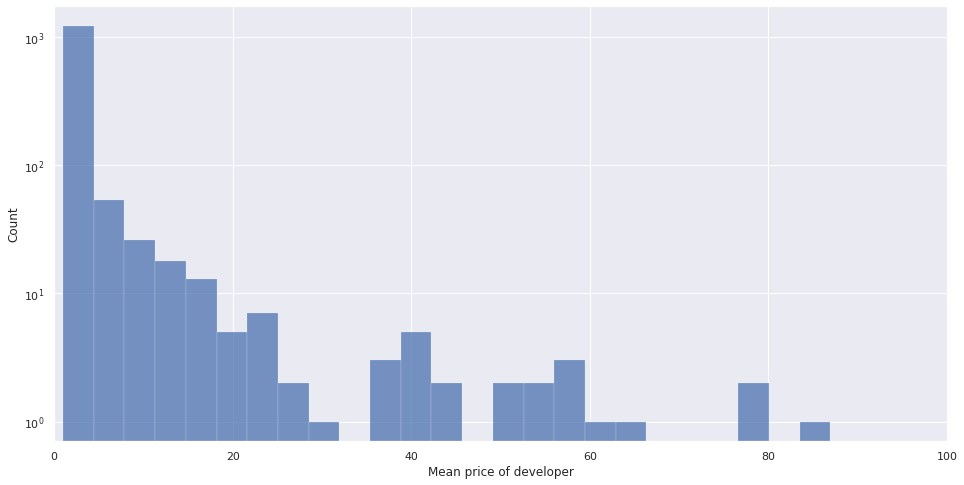

In [ ]:
plt.figure(figsize=(16,8))

g = sns.histplot(agg_developers[('price', 'mean')].value_counts(), kde=False,bins=500)
g.set_yscale('log')
plt.xlim((0,100))
plt.xlabel('Mean price of developer')
plt.show()

## Average Playtime

Text(0.5, 0, 'Average playtime')

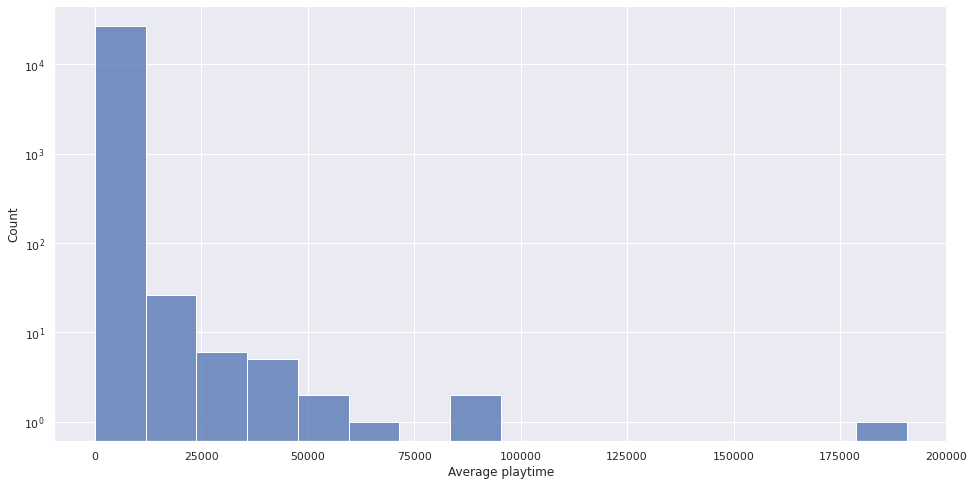

In [ ]:
plt.figure(figsize=(16,8))

g = sns.histplot(df.average_playtime, kde=False)
g.set_yscale('log')

plt.ylabel("Count")
plt.xlabel("Average playtime")

## Rating

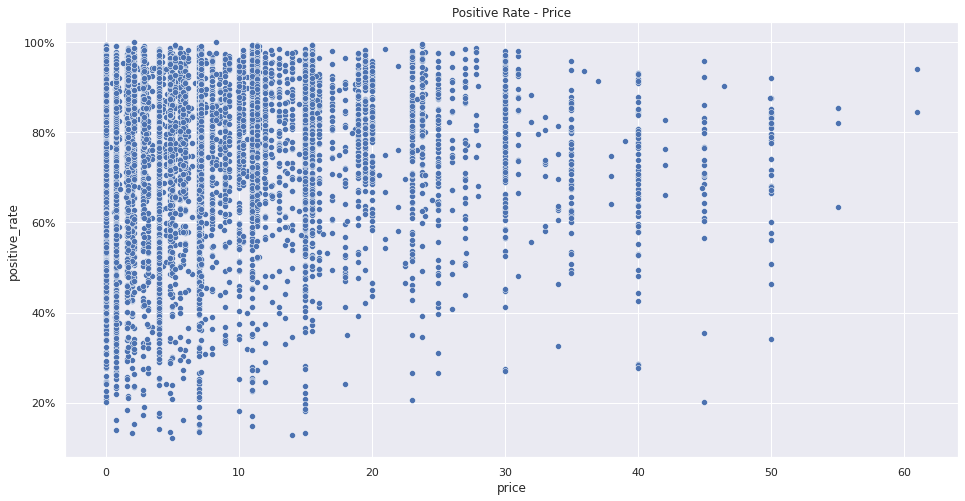

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Positive Rate - Price')
g = sns.scatterplot(x="price", y="positive_rate", data=df[(df.price <= 100) & (df.overall_reviews > 100)])

vals = g.get_yticks()
_ = g.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.show()

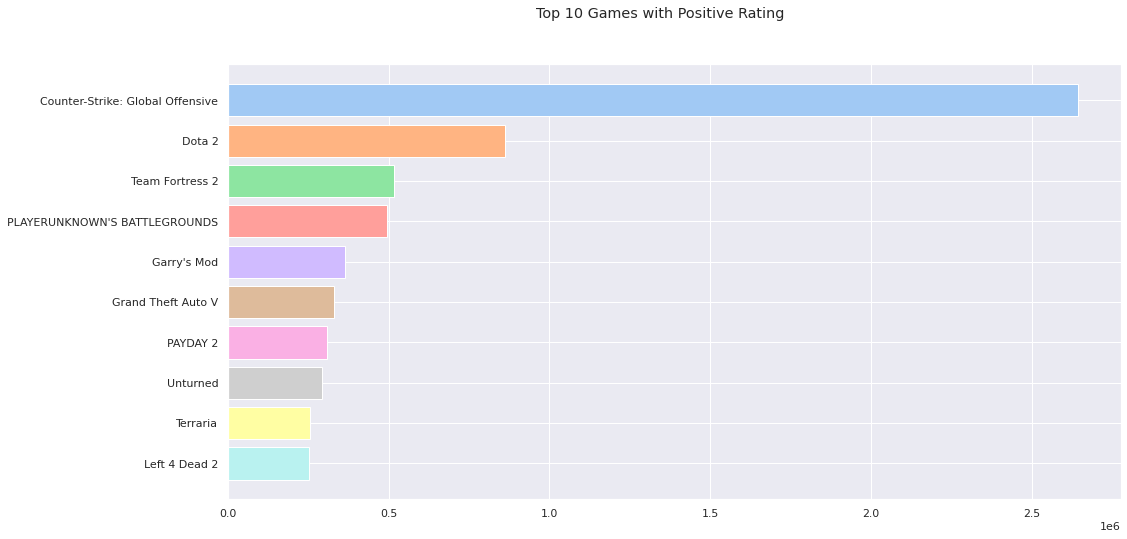

In [ ]:
positiveMessage = df.sort_values(by='positive_ratings', ascending=False).iloc[:10]
positiveRating = positiveMessage['positive_ratings']
positiveName = positiveMessage['name']

plotFigure, plotRating = plt.subplots(figsize=(16, 8))
colors = sns.color_palette('pastel')
plotRating.barh(positiveName, positiveRating, color=colors)
plotRating.invert_yaxis()
plotFigure.suptitle('Top 10 Games with Positive Rating')

plt.show()

## Various categories

In [ ]:
categories_set = set()
for i in df.categories.str.split(';'):
    categories_set.update(i)
categories_set

d = dict()
category_set = df.categories.str.split(';').apply(set)
for category in categories_set:
    d[category] = category_set.apply(lambda row: category in row)
df = df.assign(**d)

In [ ]:
trunc_year = 2010
truncated_df = df[df.release_date.dt.year>trunc_year]
palette = sns.color_palette('pastel')
def over_the_years(df, column_name, palette=palette, rate_lim=None):

    fig = plt.figure(figsize=(24, 12))
    
    yearly = df.groupby(df.release_date.dt.year.rename('release_year'))\
        .agg('count').appid.rename('count')
    p = df.groupby(df.release_date.dt.year)[column_name].mean()
    
    plt.subplot(121)
    g = sns.barplot(x=yearly.index, y=yearly, color=palette[1],label="Overall")
    g2 = sns.barplot(x=yearly.index, y=yearly * p, color=palette[2], label=f"{column_name} games")
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(f'{column_name} over the years')
    plt.xlabel('Release year')
    
    plt.subplot(122)
    g3 = sns.barplot(x=p.index, y=p, color=palette[2])
    plt.xticks(rotation=45)
    plt.xlabel('Release year')
    plt.ylabel(f'{column_name} rate')
    if rate_lim:
        g3.set_ylim(rate_lim)
    vals = g3.get_yticks()
    g3.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

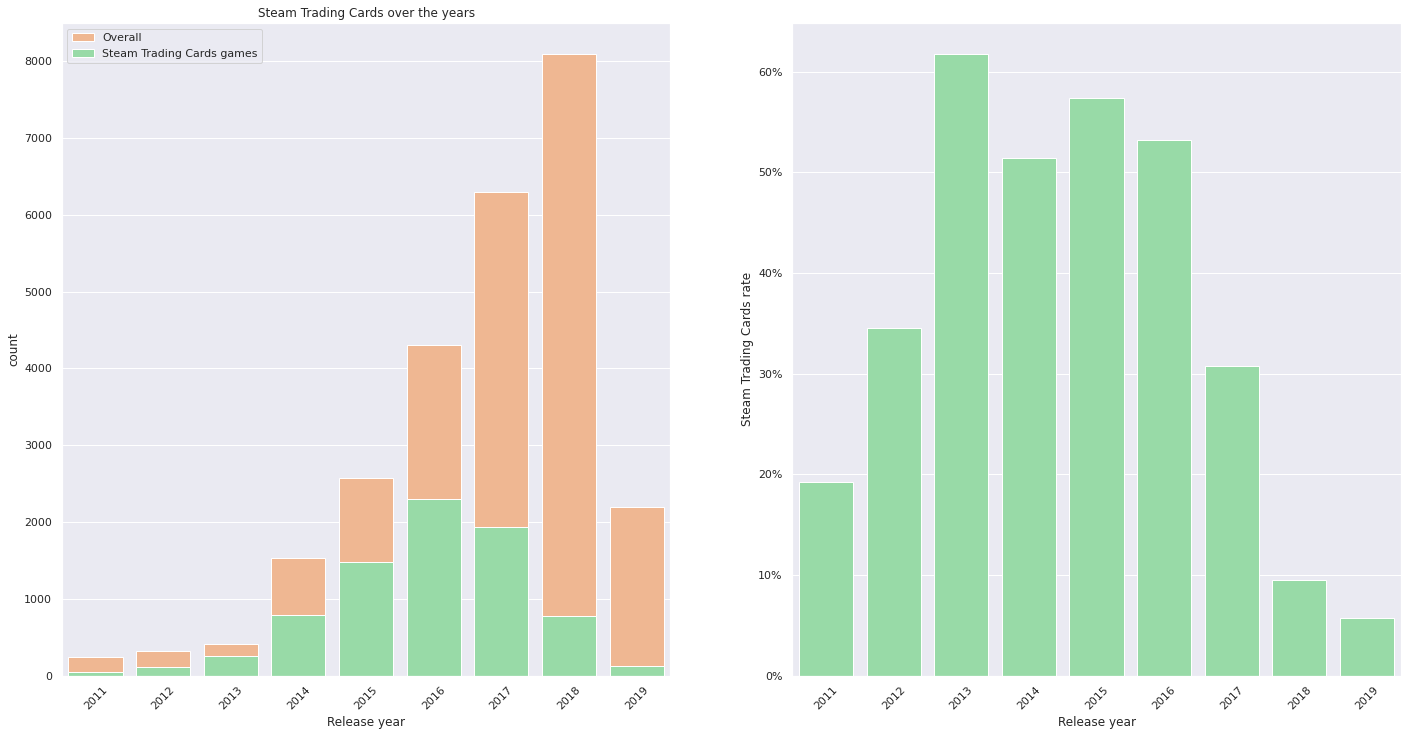

In [ ]:
over_the_years(truncated_df, 'Steam Trading Cards')

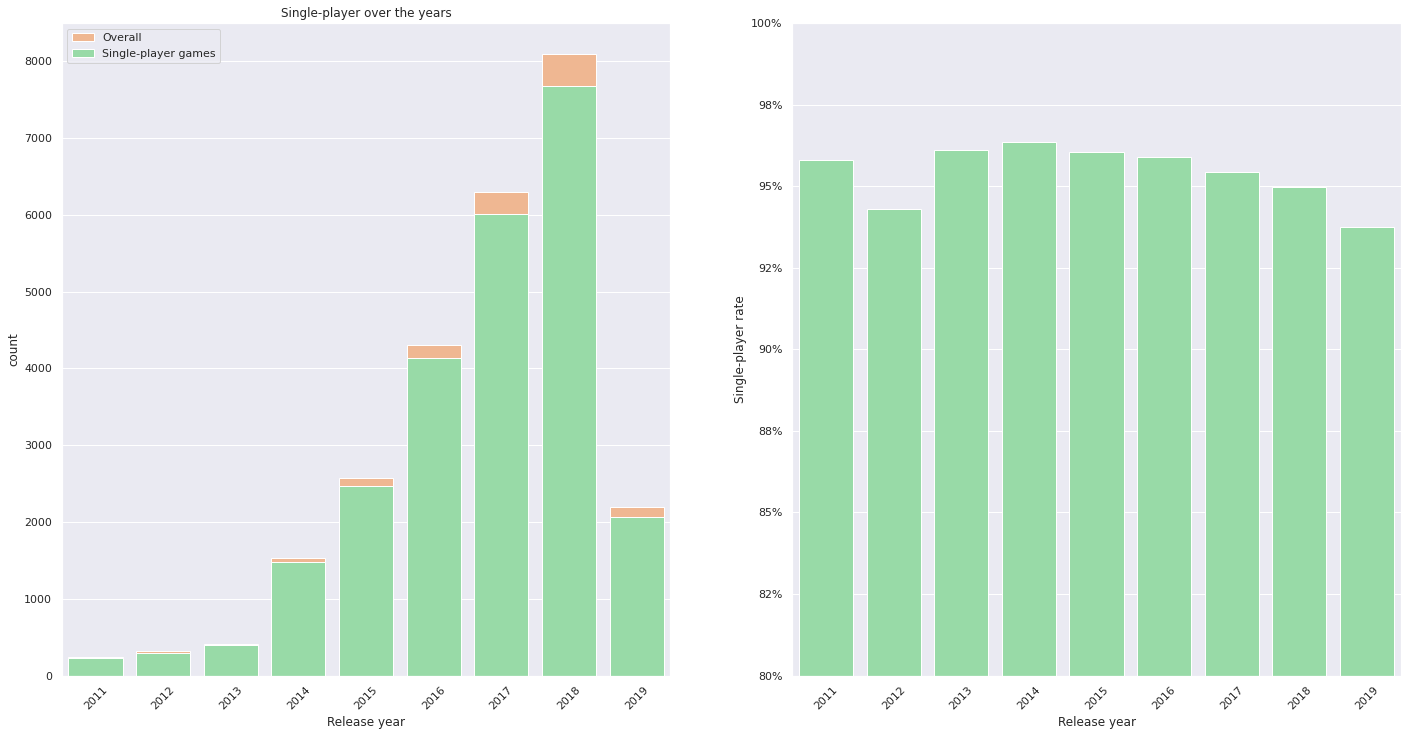

In [ ]:
over_the_years(truncated_df, 'Single-player', rate_lim=(0.8,1.0))

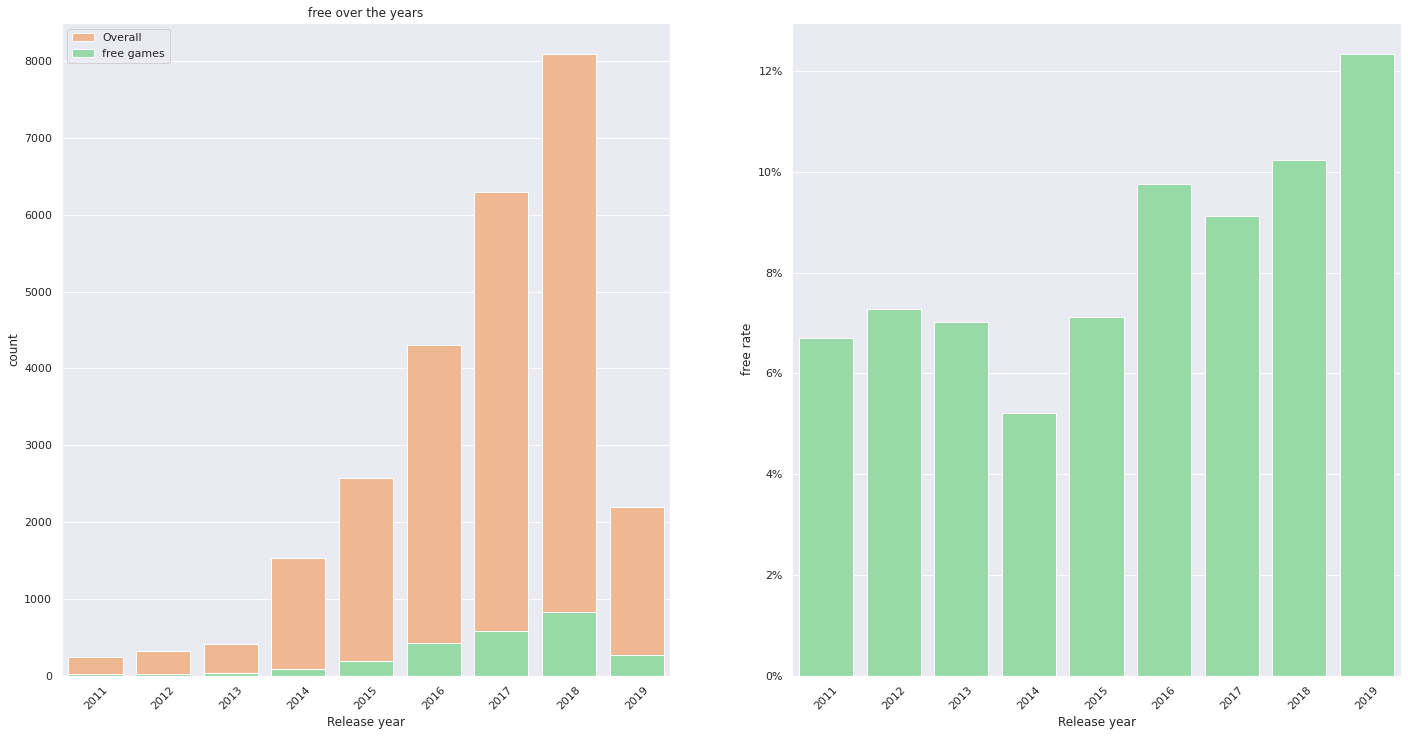

In [ ]:
over_the_years(truncated_df, 'free')

## Clustering

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import cv2

In [ ]:
G = nx.Graph()
visitedN = set()
visitedE = set()
genres = set()

In [ ]:
##tag clustering
for t in df['steamspy_tags']:
  tags = t.split(';')
  for i in range(len(tags)):
    if not tags[i] in visitedN:
      G.add_node(tags[i],weight=1)
      visitedN.add(tags[i])
    else:
      G.nodes[tags[i]]['weight']+=1

  for i in range(len(tags)):
    for j in range(i+1, len(tags)):
      if (tags[i], tags[j]) in visitedE or (tags[j], tags[i]) in visitedE:
        G[tags[i]][tags[j]]['weight']+=1
      else:
        G.add_edge(tags[i],tags[j],weight=1)
        visitedE.add((tags[i], tags[j]))
        visitedE.add((tags[j], tags[i]))

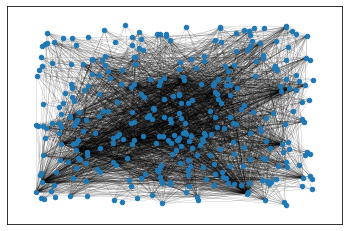

In [ ]:
pos = nx.random_layout(G)
nx.drawing.nx_pylab.draw_networkx_nodes(G, pos, None, 20)
nx.drawing.nx_pylab.draw_networkx_edges(G, pos, None, 0.1)

In [ ]:
clustering = nx.clustering(G)
nx.set_node_attributes(G, clustering, "clustering")
nx.write_gml(G, "tags.gml")

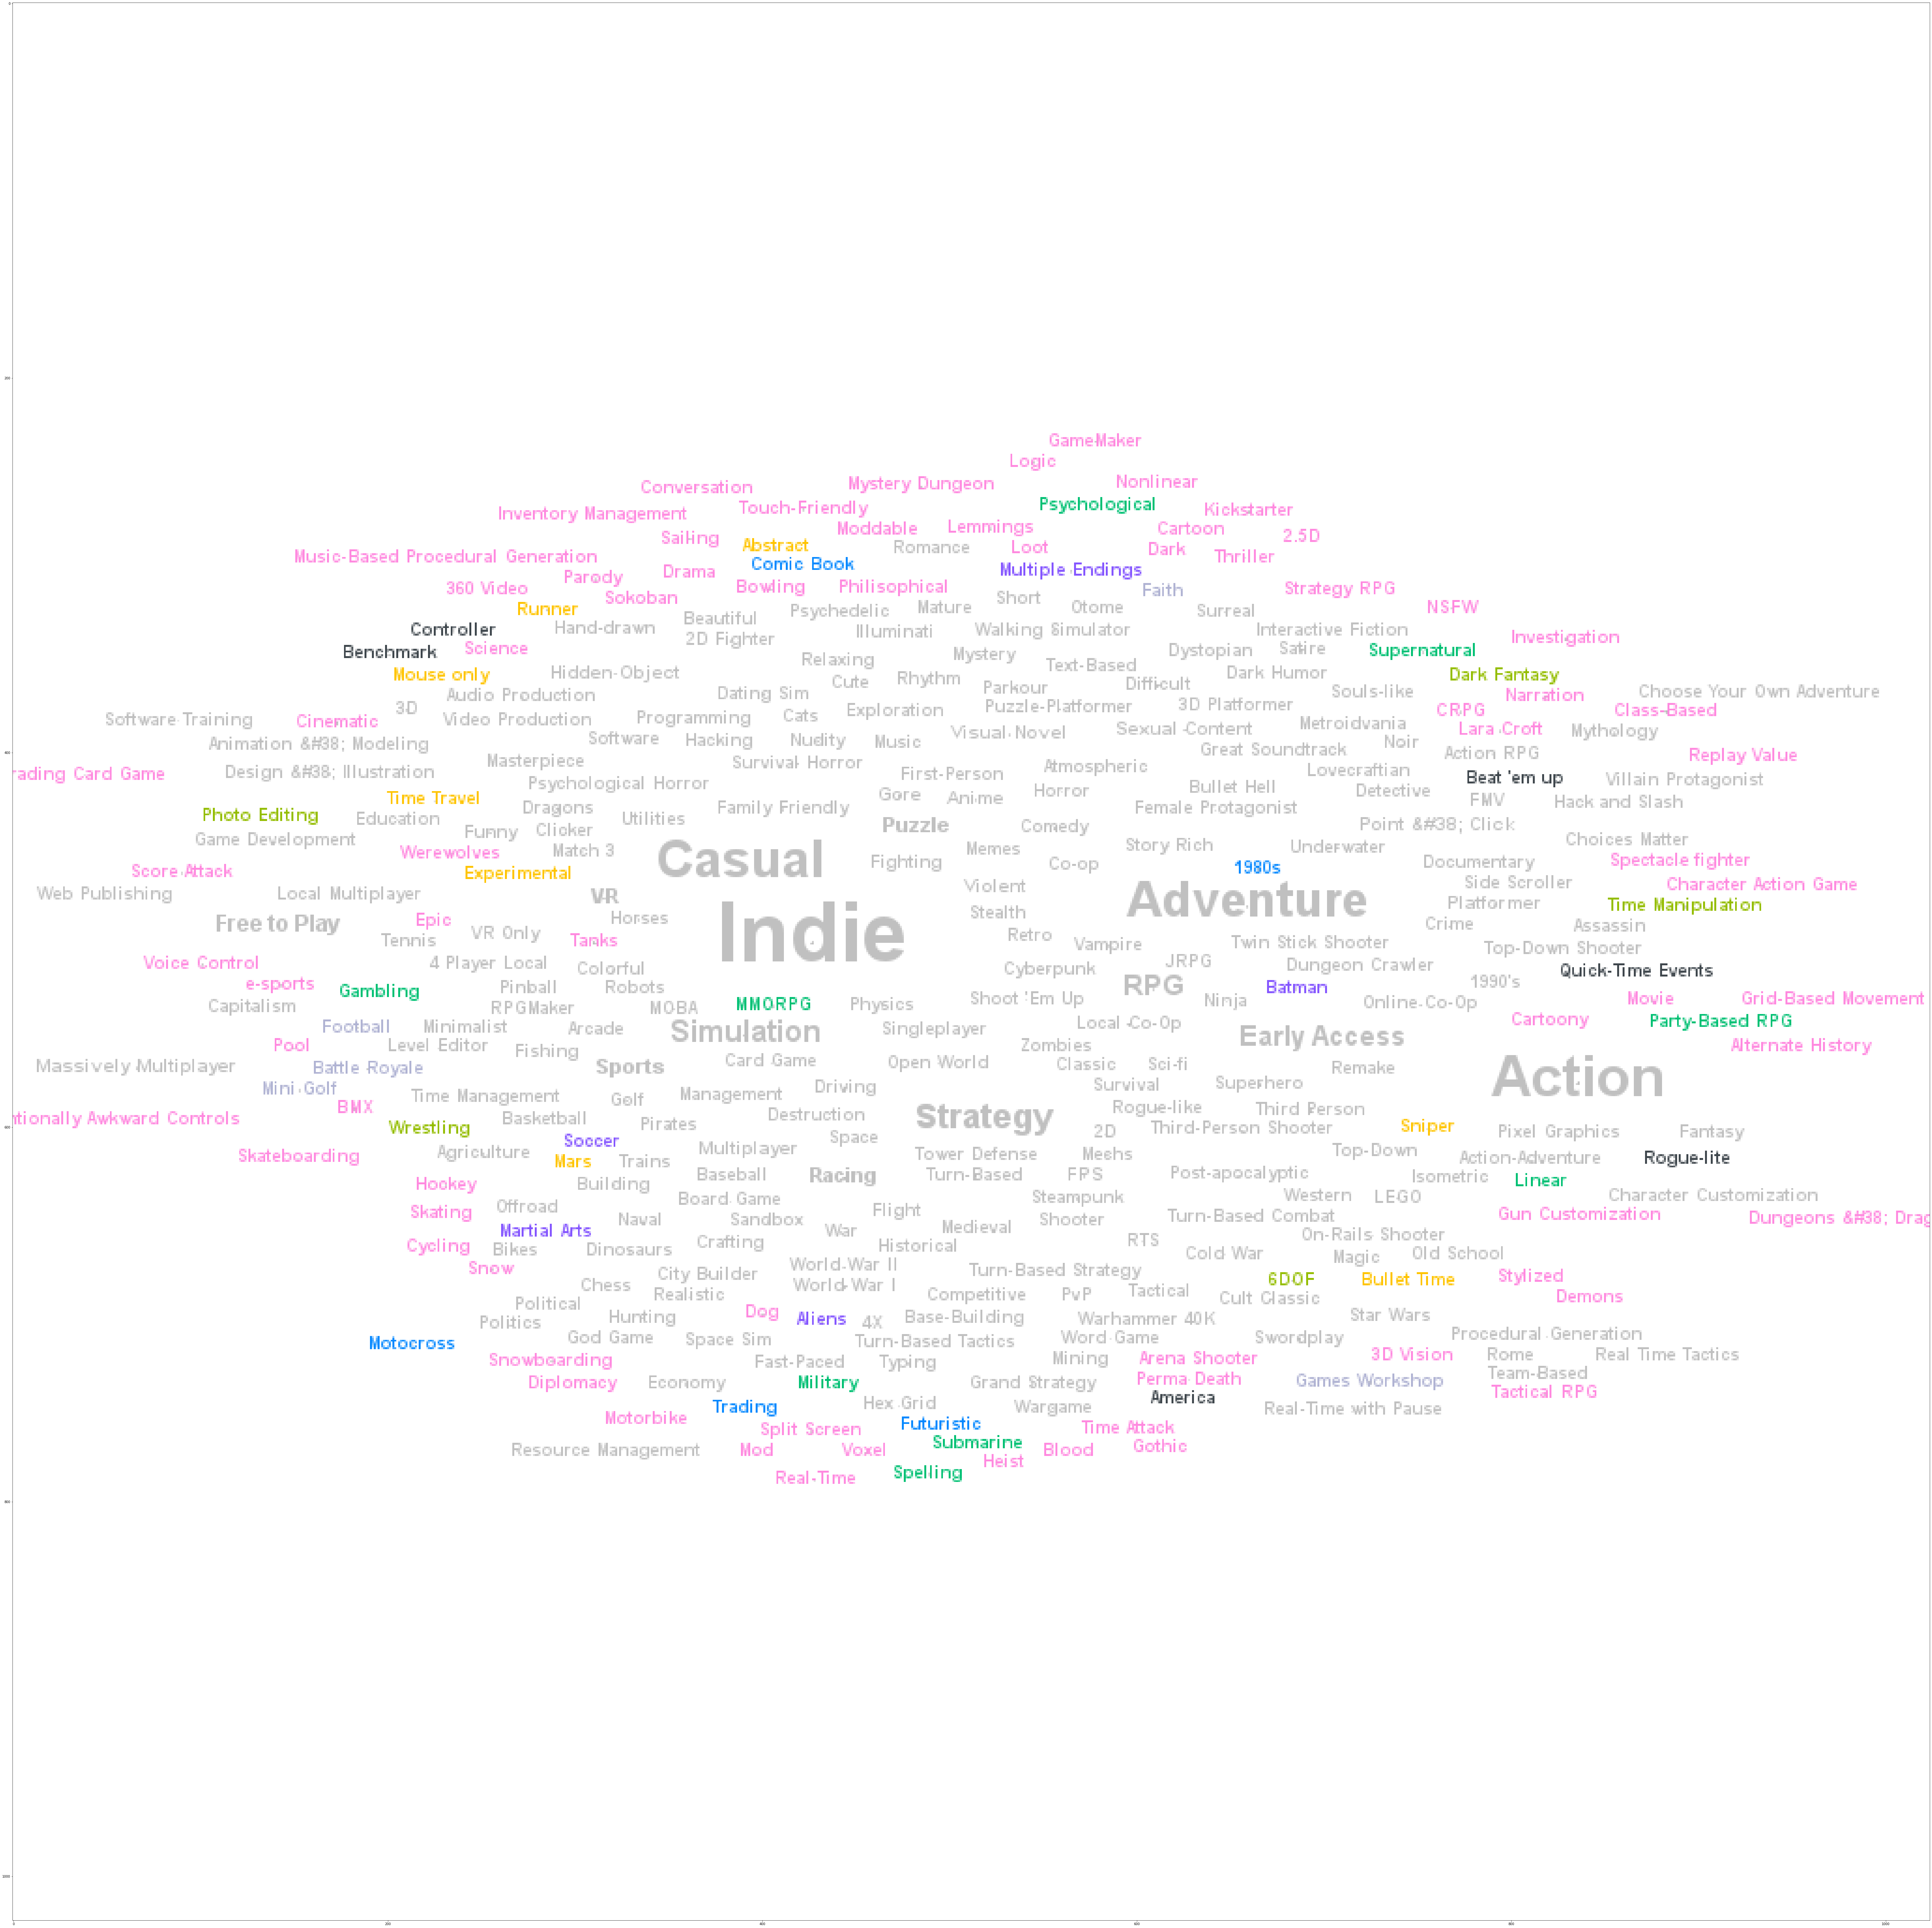

In [ ]:
Gtag = cv2.imread("tags.png")
plt.figure(figsize=(110, 110))
plt.imshow(Gtag)

## Recommendation System

In [ ]:
import gzip
from collections import defaultdict

In [ ]:
def parse_gzip_helper(f):
    for l in gzip.open(f):
        yield eval(l)

def parse_gzip(filename):
    return list(parse_gzip_helper(filename))

In [ ]:
path = '/content/temp/steam_games.json.gz'
games = parse_gzip(path)
game_list = []
for game in games:
    temp = []
    if 'id' in game:
        temp.append(game['id'])
    else:
        temp.append(0)
    if 'app_name' in game: 
        temp.append(game['app_name'])
    else:
        temp.append('')
    if 'tags' in game:
        temp.append(game['tags'])
    else:
        temp.append([])
    game_list.append(temp)

In [ ]:
path = '/content/temp/australian_users_items.json.gz'
temp1 = parse_gzip(path)

In [ ]:
user_list = []
for user in temp1:
    temp = []
    temp.append(user['steam_id'])
    bought_list = []
    for g in user['items']:
        bought_list.append(g['item_id'])
    temp.append(bought_list)
    user_list.append(temp)

In [ ]:
path = '/content/temp/bundle_data.json.gz'
bundles = parse_gzip(path)
bundle_list = []
for b in bundles:
    temp = []
    for i in b['items']:
        temp.append(i['item_id'])
    bundle_list.append(temp)

In [ ]:
numbers = [k[0] for k in game_list]
total = 0
missing_game = 0
for i in bundle_list:
    for k in i:
        total+=1
        if k not in numbers:
            game_list.append([k,'',[]])
            missing_game+=1
print(missing_game/total)

0.1452482269503546


__we currently have__: 

    game_list: game_id and the genres  
    user_list: user_id and what games he/she/it purchased  
    bundles: steam wants to sell them together, which should be given high consideration for similarities, and not much missing game in our list(only 14% game not found and then added  
   
__the plan is__:  
  
    assgin different scores to each:
    genres similarities: based on user may perfer certain types of game: horror or action and so on
    user similirities: based on the typical recommendation way that: PEOPLE BOUGHT THIS ALSO BOUGHT
    bundles: games may be bundled for series or other issue, at least they are recommended by the seller, they may be well related
    percentages are assigned depending on the final results
    

In [ ]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [ ]:
userOfGames = defaultdict(set)
gameOfUser = defaultdict(set)
genreOfGames = defaultdict(set)
for u in user_list:
    user_id = u[0]
    for g in u[1]:
        userOfGames[g].add(user_id)
        gameOfUser[user_id].add(g)
for g in game_list:
    game_id = g[0]
    for t in g[2]:
        genreOfGames[game_id].add(t)

In [ ]:
def type_sim(game_id):
    sim = []
    for g in game_list:
        if g[0] == game_id:
            sim.append(0)
        else:
            sim.append(Jaccard(genreOfGames[game_id],genreOfGames[g[0]]))
    return sim

def user_sim(game_id):
    sim = []
    for g in game_list:
        if g[0] == game_id:
            sim.append(0)
        else:
            sim.append(Jaccard(userOfGames[game_id],userOfGames[g[0]]))
    return sim

def bundle_bonus(game_id):
    bonus = defaultdict(int)
    for b in bundle_list:
        if game_id not in b:
            continue
        else:
            for g in b:
                if g == game_id:
                    continue
                else:
                    bonus[g]+=0.1
    return bonus

In [ ]:
def game_recommender(game_id,top = 10,type_w = 0.4,user_w = 0.4,bund_w = 0.2):
    type_l = type_sim(game_id)
    user_l = user_sim(game_id)
    bonus = bundle_bonus(game_id)
    score_list = []
    for i in range(len(game_list)):
        if game_id == game_list[i][0]:
            print(game_list[i][1])
            continue
        temp = []
        temp.append(type_w*type_l[i]+user_w*user_l[i]+bund_w*bonus[game_list[i][0]])
        temp.append(game_list[i][1])
        score_list.append(temp)
    score_list = sorted(score_list,reverse=True)
    game_name = []
    for i in range(top):
        print(score_list[i][1],score_list[i][0])
        #game_name.append(score_list[i][1])
    #return game_name

In [ ]:
game_recommender('768880')

Beach Rules
Naughty Elves 0.26666666666666666
Louie Cooks 0.24
Toast Time 0.22857142857142856
NGHTMN 0.22857142857142856
Carrie's Order Up! 0.22857142857142856
Winter Novel 0.2
Universe in Fire 0.2
True or False 2 0.2
Tower of Archeos 0.2
The Normal Day 0.2


## Reference


1. https://www.kaggle.com/nikdavis/starter-steam-store-games-329b4232-9
2. https://www.kaggle.com/vadrichvonorso/small-recommendation-system
3. https://www.kaggle.com/valentinthouzeau/videogamesclustering
4. https://pyvis.readthedocs.io/en/latest/


